In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans
import missingno as mn
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

from sklearn.metrics import silhouette_score
from matplotlib.colors import LinearSegmentedColormap


In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()


,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [51]:
df.shape

(200, 5)

In [52]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [53]:
df.dtypes



CustomerID        int64
Gender           object
Age               int64
AnnualIncome      int64
SpendingScore     int64
dtype: object

In [54]:
df.isnull().sum()


CustomerID       0
Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

In [55]:
plt.style.use('fivethirtyeight')

<AxesSubplot:>

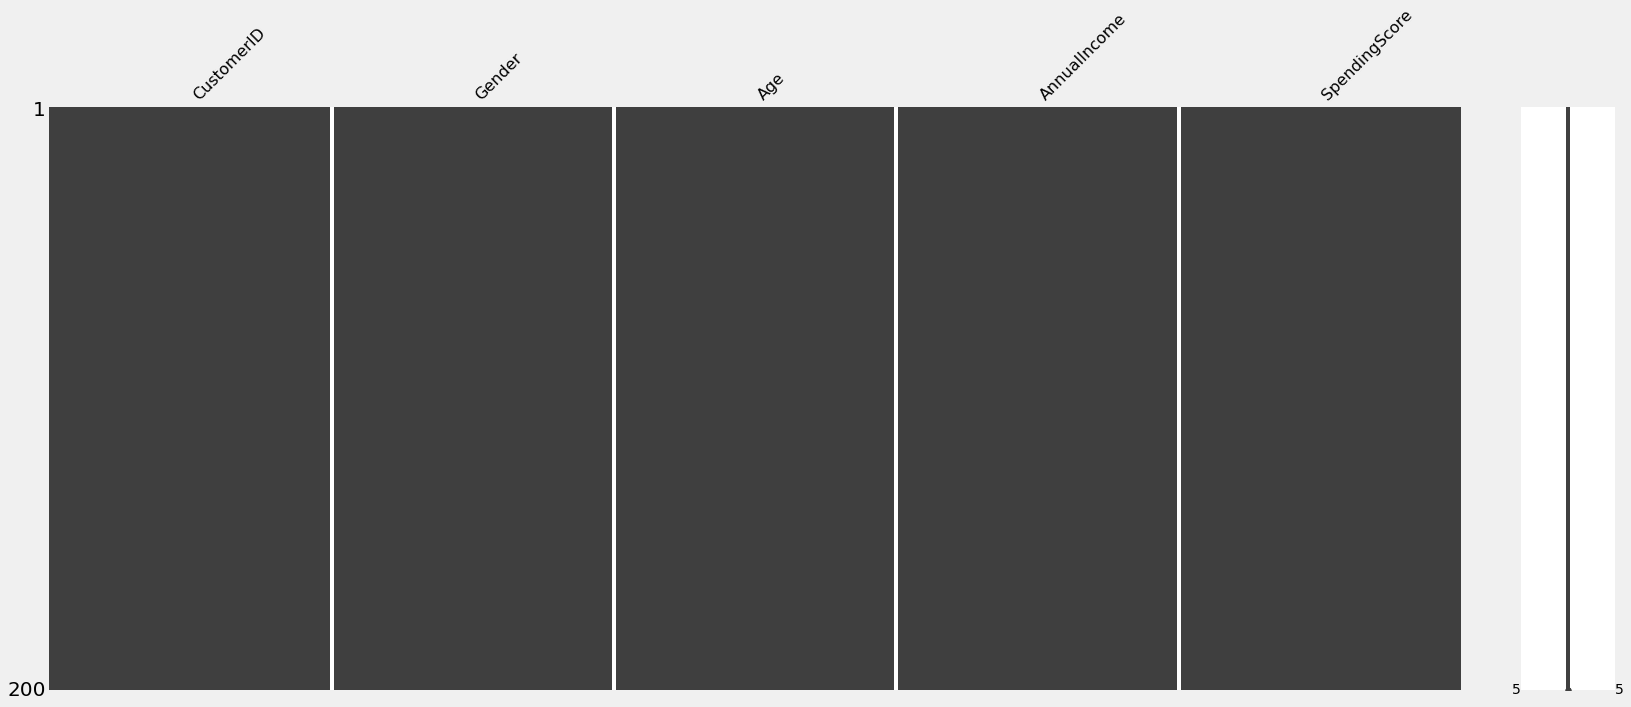

In [56]:
# Checking if any value is missing in data.

mn.matrix(df)  # missing data patterns


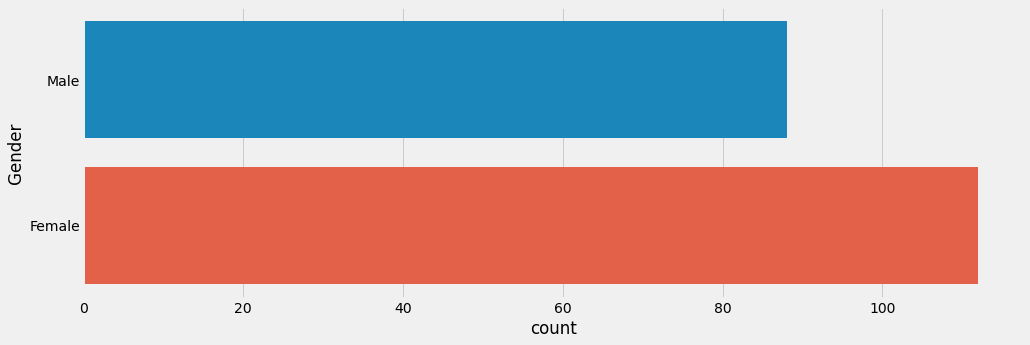

In [57]:
# Plotting Bar chart for Gender comaprison.

plt.figure(1 , figsize = (15 , 5))  #argument sets the width to 15 units and the height to 5 units.
sns.countplot(y = 'Gender' , data = df) #count plot is generated using sns.countplot. The y parameter is set to 'Gender', 
plt.show()


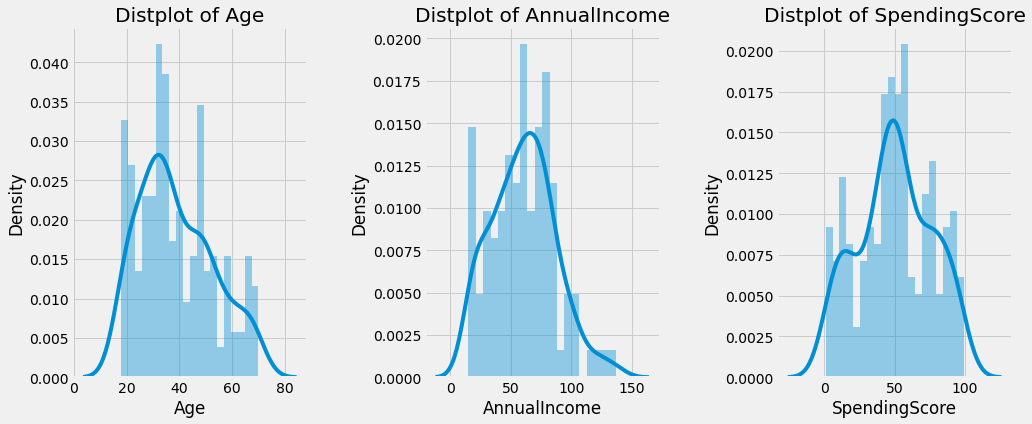

In [58]:
# Plotting the distribution plot for Age,Anunal Income and Spennding Score.

plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' ,'AnnualIncome' ,'SpendingScore']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()


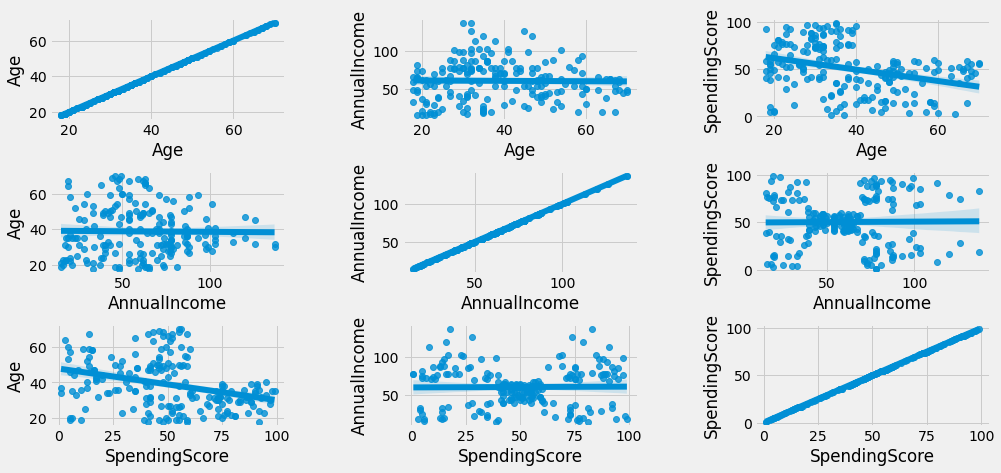

In [60]:
# Plotting Reg Chart for Age Anunal Imcome and Spending Score .

plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' ,'AnnualIncome' ,'SpendingScore']:
    for y in ['Age' ,'AnnualIncome' ,'SpendingScore']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()


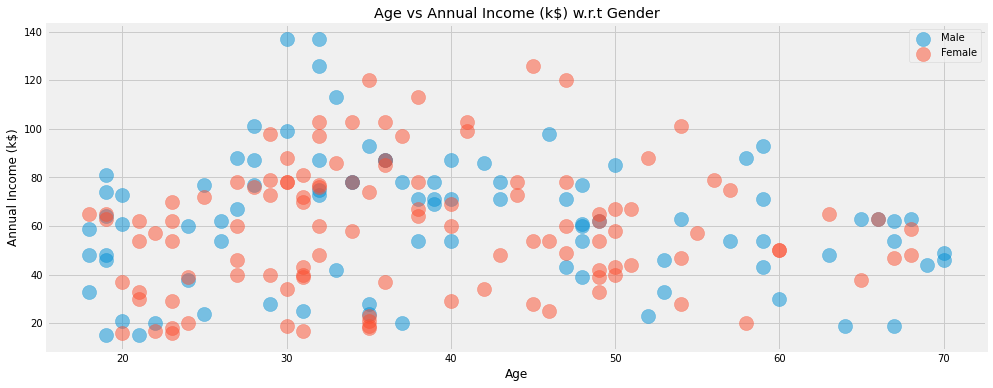

In [30]:
# Plotting Scatter Chart for Age Vs Anunal_Income W.R.T Gender.

plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)  #The x parameter is set to 'Age', and the y parameter is set to 'Annual Income (k$)'. The
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)')  #creating the scatter plots for both genders, axis labels are set using plt.xlabel and plt.ylabel
plt.title('Age vs Annual Income (k$) w.r.t Gender')
plt.legend()
plt.show()

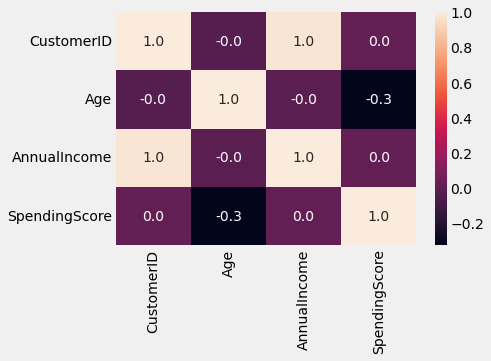

In [61]:
# Rescaling of Data is done here.
x= df.iloc[:,3:5]  #iloc function is used to extract the desired columns.

sns.heatmap(df.corr(),annot=True,fmt='.1f') #heatmap, a visual representation of the correlations is generated.
plt.show()

In [62]:
print('Max  :',max(df[df['Gender']=='Male'].Age))
print('Min  :',min(df[df['Gender']=='Male'].Age))
print('Mean :',np.mean(df[df['Gender']=='Male'].Age))
print('Std  :',np.std(df[df['Gender']=='Male'].Age))

Max  : 70
Min  : 18
Mean : 39.80681818181818
Std  : 15.426407372472944


In [64]:
#Male SpendingScore 
print('Max  :',max(df[df['Gender']=='Male'].SpendingScore))
print('Min  :',min(df[df['Gender']=='Male'].SpendingScore))
print('Mean :',np.mean(df[df['Gender']=='Male'].SpendingScore))
print('Std  :',np.std(df[df['Gender']=='Male'].SpendingScore))

Max  : 97
Min  : 1
Mean : 48.51136363636363
Std  : 27.737812359739767


In [65]:
print('Max  :',max(df[df['Gender']=='Male'].AnnualIncome))
print('Min  :',min(df[df['Gender']=='Male'].AnnualIncome))
print('Mean :',np.mean(df[df['Gender']=='Male'].AnnualIncome))
print('Std  :',np.std(df[df['Gender']=='Male'].AnnualIncome))


Max  : 137
Min  : 15
Mean : 62.22727272727273
Std  : 26.486586344758496


In [66]:
#Female SpendingScore
print('Max  :',max(df[df['Gender']=='Female'].SpendingScore))
print('Min  :',min(df[df['Gender']=='Female'].SpendingScore))
print('Mean :',np.mean(df[df['Gender']=='Female'].SpendingScore))
print('Std  :',np.std(df[df['Gender']=='Female'].SpendingScore))


Max  : 99
Min  : 5
Mean : 51.526785714285715
Std  : 24.00705246880166


In [67]:
df.Age.unique()
print(len(df.Age.unique()))
df.Age.value_counts()[:10]


51


32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
Name: Age, dtype: int64

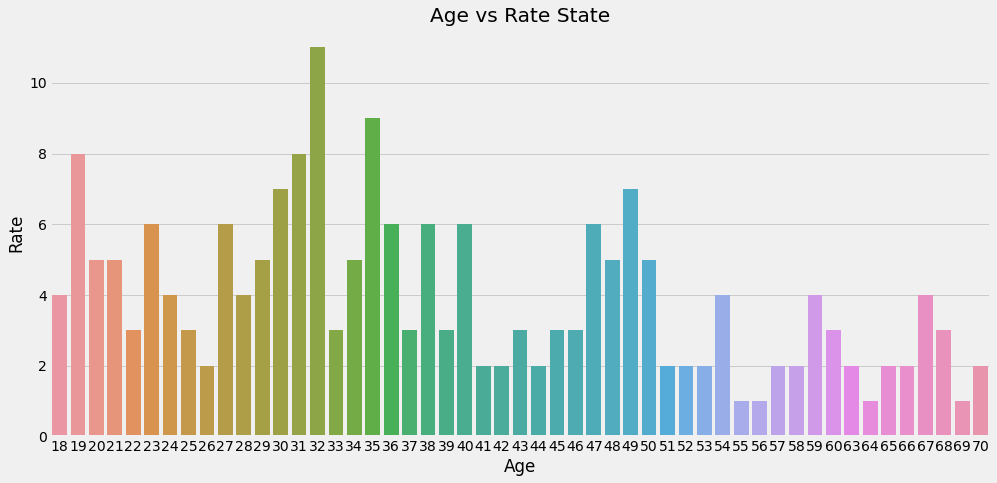

In [68]:
plt.figure(figsize=(15,7))
sns.barplot(x=df.Age.value_counts().index,y=df.Age.value_counts().values)
plt.xlabel('Age')
plt.ylabel('Rate')
plt.title('Age vs Rate State')
plt.show()

In [69]:
age_income=[]
age_unique=df.Age.unique()
for age in age_unique:
    age_income.append(sum(df[df['Age']==age].AnnualIncome))

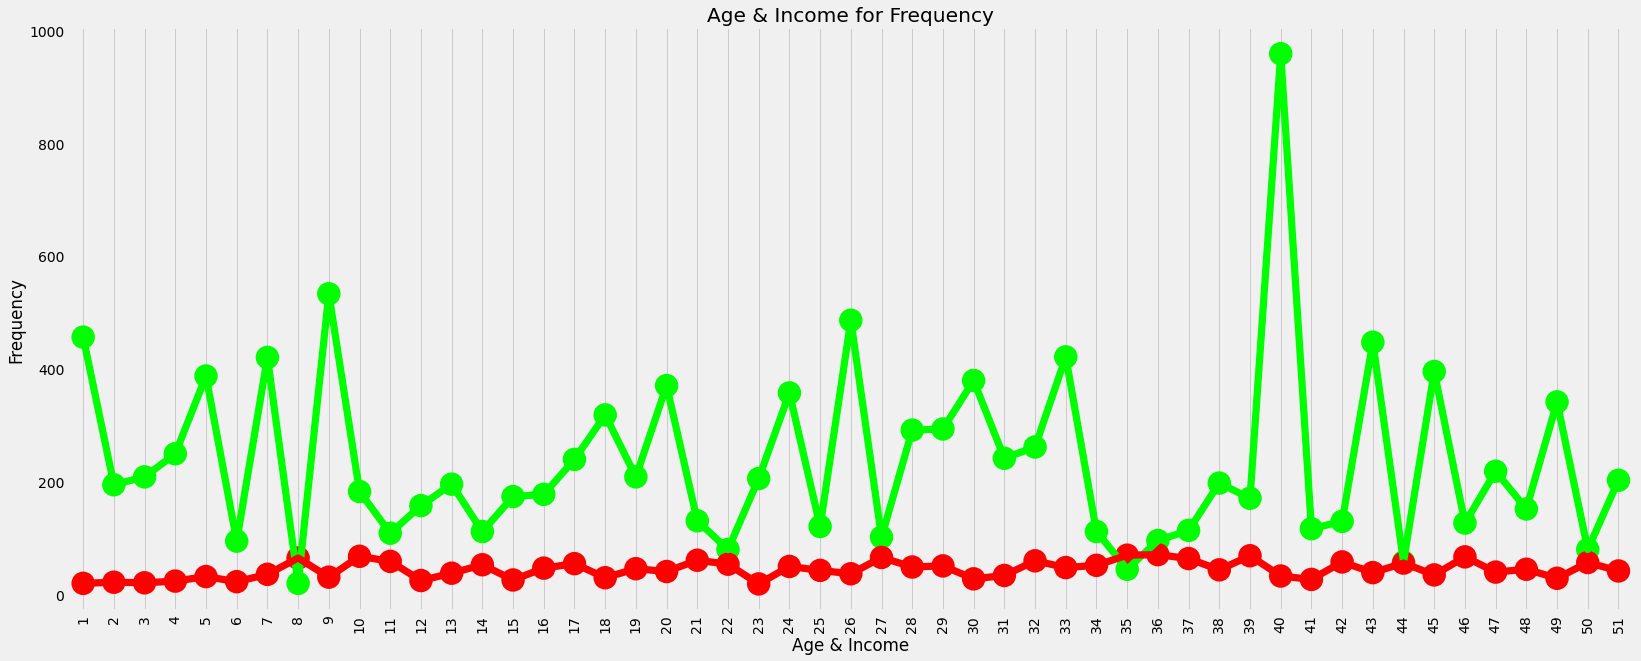

In [70]:
#Age show point plot
f,ax1=plt.subplots(figsize=(25,10))
sns.pointplot(x=np.arange(1,52),y=age_income,color='lime',alpha=0.8,label='Income')
sns.pointplot(x=np.arange(1,52),y=age_unique,color='red',alpha=0.5,label='Age')
plt.xlabel('Age & Income')
plt.ylabel('Frequency')
plt.title('Age & Income for Frequency')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [71]:
age_female_income=[]
age_male_income=[]
for age in age_unique:
    age_male_income.append(sum(df[np.logical_and(df['Gender']=='Male',df['Age']==age)].AnnualIncome))
    age_female_income.append(sum(df[np.logical_and(df['Gender']=='Female',df['Age']==age)].AnnualIncome))
    

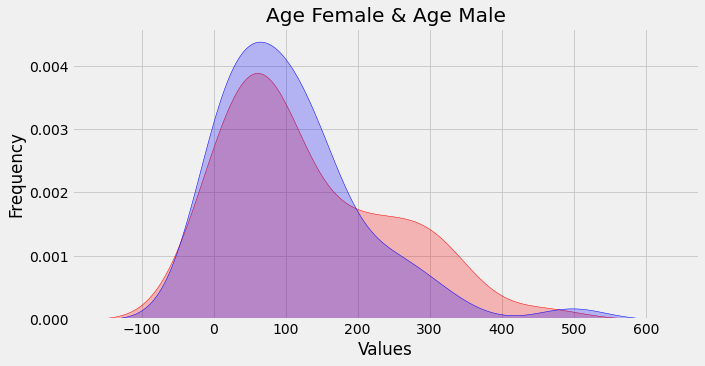

In [72]:
plt.figure(figsize=(10,5))
sns.kdeplot(age_female_income,shade=True,color='r')
sns.kdeplot(age_male_income,shade=True,color='b')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Age Female & Age Male')
plt.show()

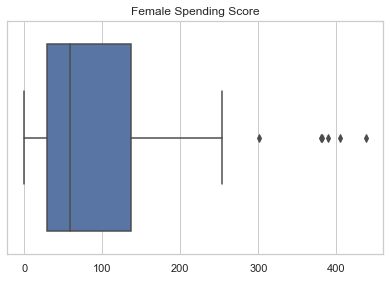

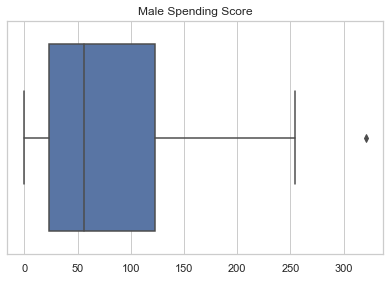

In [73]:
age_female_spendingScore=[]
age_male_spendingScore=[]
for age in age_unique:
    age_male_spendingScore.append(sum(df[np.logical_and(df['Gender']=='Male',df['Age']==age)].SpendingScore))
    age_female_spendingScore.append(sum(df[np.logical_and(df['Gender']=='Female',df['Age']==age)].SpendingScore))
sns.set(style='whitegrid')
sns.boxplot(age_female_spendingScore)
plt.title('Female Spending Score')
plt.show()
sns.set(style='whitegrid')
sns.boxplot(age_male_spendingScore)
plt.title('Male Spending Score')
plt.show()

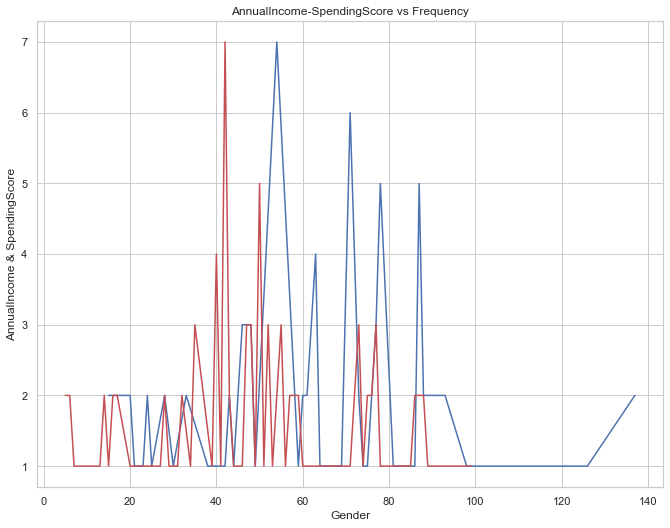

In [74]:
plt.figure(figsize=(10,8))
df[df['Gender']=='Male']['AnnualIncome'].value_counts().sort_index().plot.line(color='b')
df[df['Gender']=='Female']['SpendingScore'].value_counts().sort_index().plot.line(color='r')
plt.xlabel('Gender')
plt.ylabel('AnnualIncome & SpendingScore')
plt.title('AnnualIncome-SpendingScore vs Frequency')
plt.show()

In [75]:
df['GenderValue']=[ 0 if gender=='Female' else 1 for gender in df.Gender]
df.dtypes
df['AgesBetween']= pd.cut(df['Age'],5)
df.AgesBetween.unique()
age_between=[]
for age in df.Age:
    if((age>=17.948 and age<28.4)):
        age_between.append(0)
    elif((age>=28.4 and age<38.8)):
        age_between.append(1)
    elif((age>=38.8 and age<49.2)):
        age_between.append(2)
    elif((age>=49.2 and age<59.6)):
        age_between.append(3)
    elif((age>=59.6 and age<=70.0)):
        age_between.append(4)
len(age_between)
age_between[:10]

[0, 0, 0, 0, 1, 0, 1, 0, 4, 1]

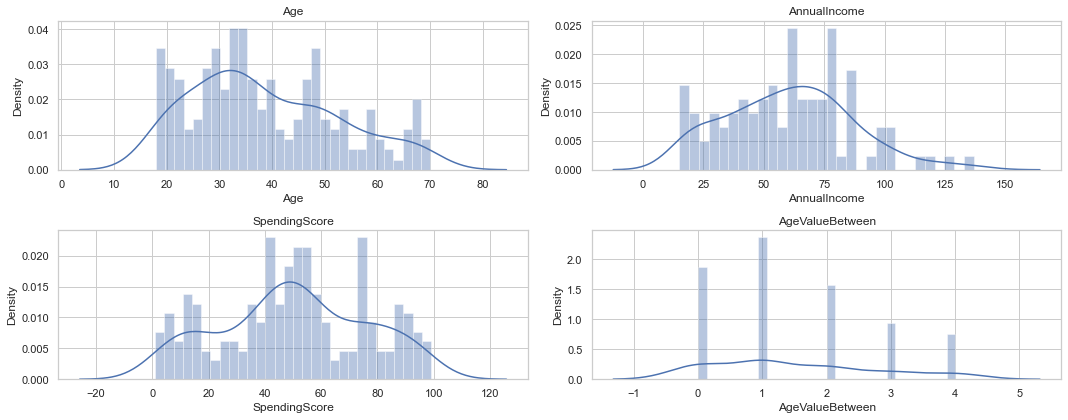

In [76]:
age_between=pd.DataFrame(data=age_between,index=range(0,200),columns=['AgeValueBetween'])
df.sample(10)
df=pd.concat([df,age_between],axis=1)
plt.figure(1 , figsize = (15 , 6))
for i,col in enumerate(['Age','AnnualIncome','SpendingScore','AgeValueBetween']):
    i=i+1
    plt.subplot(2 , 2,i)
    plt.title(col)
    sns.distplot(df[col] , bins = 30)
    plt.tight_layout()
plt.show()


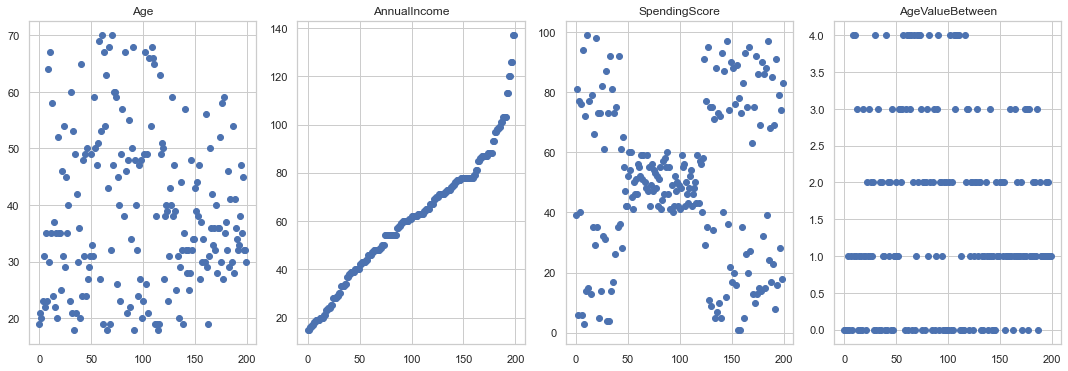

In [77]:
for i,col in enumerate(['Age', 'AnnualIncome', 'SpendingScore','AgeValueBetween']):
    plt.subplot(2,4,i+1)
    plt.scatter([i for i in range(200)],df[col].values.tolist())
    plt.title(col)
    fig,ax=plt.gcf(),plt.gca()
    fig.set_size_inches(15,10)
    plt.tight_layout()
plt.show()


,CustomerID,Age,AnnualIncome,SpendingScore
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


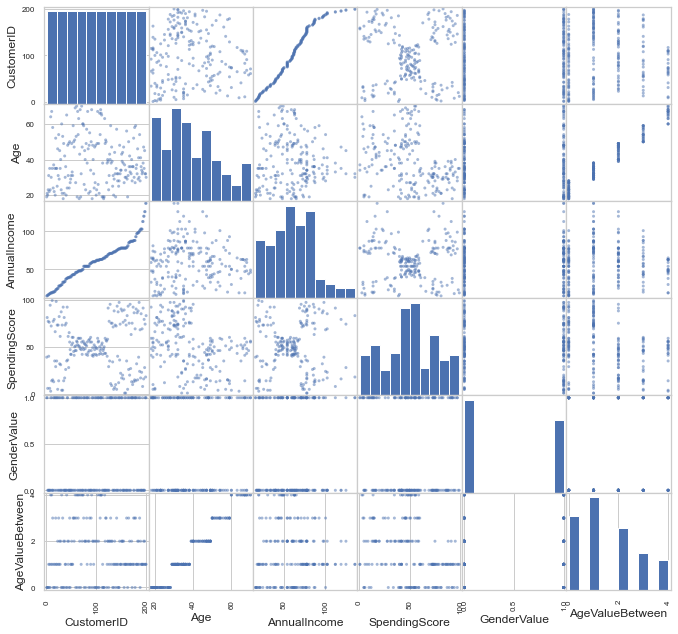

<Figure size 432x288 with 0 Axes>

In [78]:
pd.plotting.scatter_matrix(df,figsize=(10,10))
plt.figure()

df.drop(['Gender','AgesBetween'],axis=1,inplace=True)
df.drop(['GenderValue','AgeValueBetween'],axis=1,inplace=True)

df.head()

In [79]:
log_data=np.log(df)
good_data=log_data.drop([128,65,66,75,154])
good_data[:10]

,CustomerID,Age,AnnualIncome,SpendingScore
0,0.000000,2.944439,2.708050,3.663562
1,0.693147,3.044522,2.708050,4.394449
2,1.098612,2.995732,2.772589,1.791759
3,1.386294,3.135494,2.772589,4.343805
4,1.609438,3.433987,2.833213,3.688879
5,1.791759,3.091042,2.833213,4.330733
6,1.945910,3.555348,2.890372,1.791759
7,2.079442,3.135494,2.890372,4.543295
8,2.197225,4.158883,2.944439,1.098612
9,2.302585,3.401197,2.944439,4.276666


In [80]:
from sklearn.decomposition import PCA
pca=PCA().fit(good_data)
print(pca.explained_variance_ratio_)
print()
print(good_data.columns.values.tolist())
print(pca.components_)

[0.58402105 0.34756297 0.06146719 0.00694879]

['CustomerID', 'Age', 'AnnualIncome', 'SpendingScore']
[[-0.88492887 -0.04318647 -0.460206   -0.056976  ]
 [ 0.04281855  0.11355813  0.02984258 -0.99215954]
 [ 0.01298001 -0.99044883  0.08164755 -0.11034632]
 [-0.46357199  0.06519658  0.883546    0.01403143]]


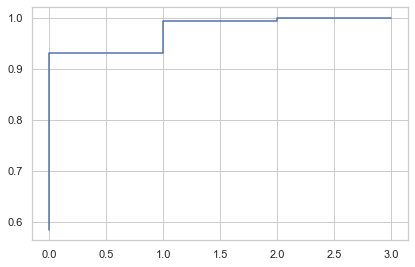

In [81]:
cumulative=np.cumsum(pca.explained_variance_ratio_)
plt.step([i for i in range(len(cumulative))],cumulative)
plt.show()


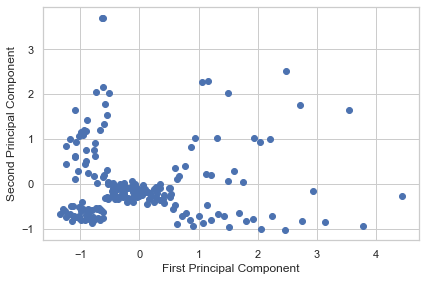

In [82]:
pca=PCA(n_components=2)
pca.fit(good_data)
reduced_data=pca.transform(good_data)
inverse_data=pca.inverse_transform(reduced_data)
plt.scatter(reduced_data[:,0],reduced_data[:,1],label='reduced')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


In [83]:
reduced_data=pd.DataFrame(reduced_data,columns=['Dim1','Dim2'])
reduced_data[:10]

,Dim1,Dim2
0,4.434201,-0.266976
1,3.774850,-0.951088
2,3.536739,1.644942
3,3.130720,-0.858906
4,2.929778,-0.163854
5,2.746676,-0.831813
6,2.708568,1.748286
7,2.451763,-1.023636
8,2.474719,2.516909
9,2.233131,-0.717757


In [84]:
cmap=LinearSegmentedColormap.from_list('BlRd',['blue','red','cyan'])

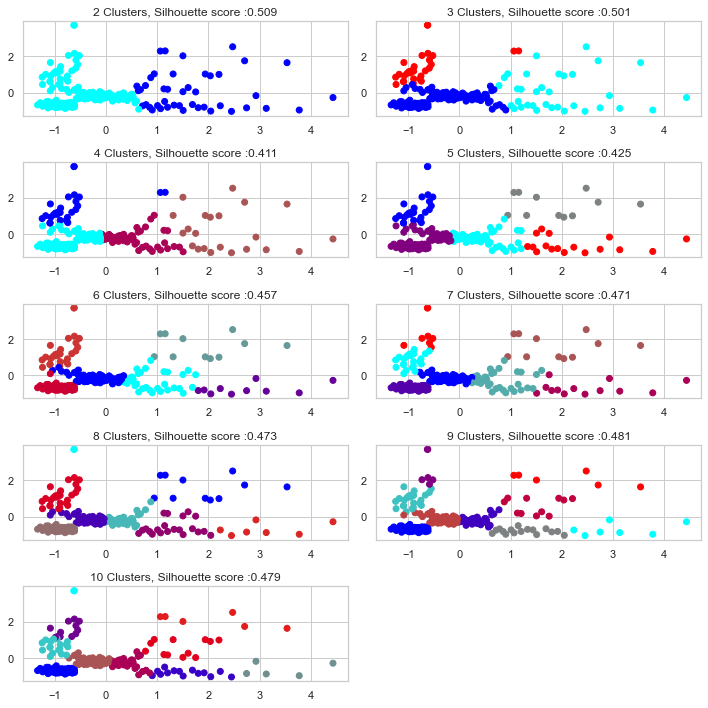

In [85]:
silhouette_scores=[]
for i in range(2,11):
    cl=KMeans(n_clusters=i,random_state=0)
    result=cl.fit_predict(reduced_data)
    silhouette=silhouette_score(reduced_data,result)
    silhouette_scores.append(silhouette)
    plt.subplot(5,2,i-1)
    plt.scatter(reduced_data.Dim1.values,reduced_data.Dim2.values,c=result,cmap=cmap)
    plt.title(str(i)+' Clusters, Silhouette score :'+ str(silhouette)[:5])
    fig,ax=plt.gcf(),plt.gca()
    fig.set_size_inches(10,10)
    plt.tight_layout()
plt.show()

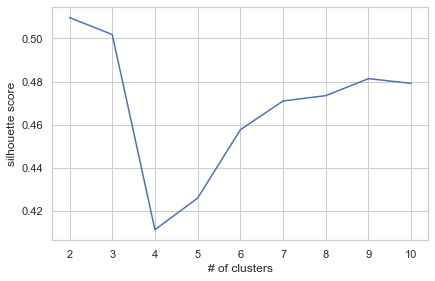

In [86]:
plt.plot([i for i in range(2,11)],silhouette_scores)
plt.xlabel('# of clusters')
plt.ylabel('silhouette score')
plt.show()

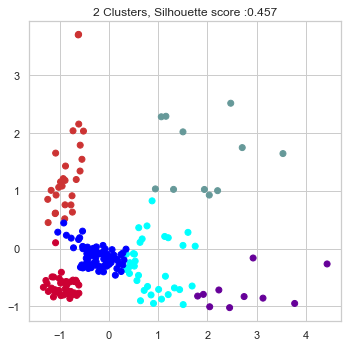

In [87]:
cl=KMeans(n_clusters=6,random_state=0)
result=cl.fit_predict(reduced_data)
silhouette=silhouette_score(reduced_data,result)
plt.scatter(reduced_data.Dim1.values,reduced_data.Dim2.values,c=result,cmap=cmap)
plt.title(str(2)+' Clusters, Silhouette score :'+str(silhouette)[:5])
fig,ax=plt.gcf(),plt.gca()
fig.set_size_inches(5,5)
plt.tight_layout()
plt.show()


In [88]:
kmeans=KMeans(n_clusters=6,init='k-means++',max_iter=300,random_state=0)
y_kmeans=kmeans.fit_predict(reduced_data)


In [89]:
reduced_data_X=reduced_data.to_numpy()


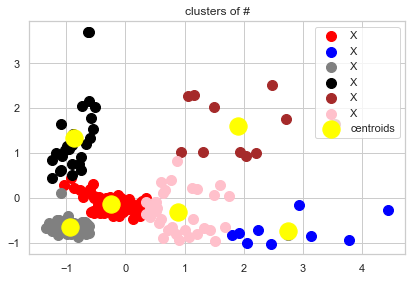

In [90]:
plt.scatter(reduced_data_X[y_kmeans==0,0],reduced_data_X[y_kmeans==0,1],s=100,c='red',label='X')
plt.scatter(reduced_data_X[y_kmeans==1,0],reduced_data_X[y_kmeans==1,1],s=100,c='blue',label='X')
plt.scatter(reduced_data_X[y_kmeans==2,0],reduced_data_X[y_kmeans==2,1],s=100,c='gray',label='X')
plt.scatter(reduced_data_X[y_kmeans==3,0],reduced_data_X[y_kmeans==3,1],s=100,c='black',label='X')
plt.scatter(reduced_data_X[y_kmeans==4,0],reduced_data_X[y_kmeans==4,1],s=100,c='brown',label='X')
plt.scatter(reduced_data_X[y_kmeans==5,0],reduced_data_X[y_kmeans==5,1],s=100,c='pink',label='X')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='centroids')
plt.title('clusters of #')
plt.legend()
plt.show()

In [91]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster

In [92]:
methods=['ward','single','complete','average','weighted','centroid','median']


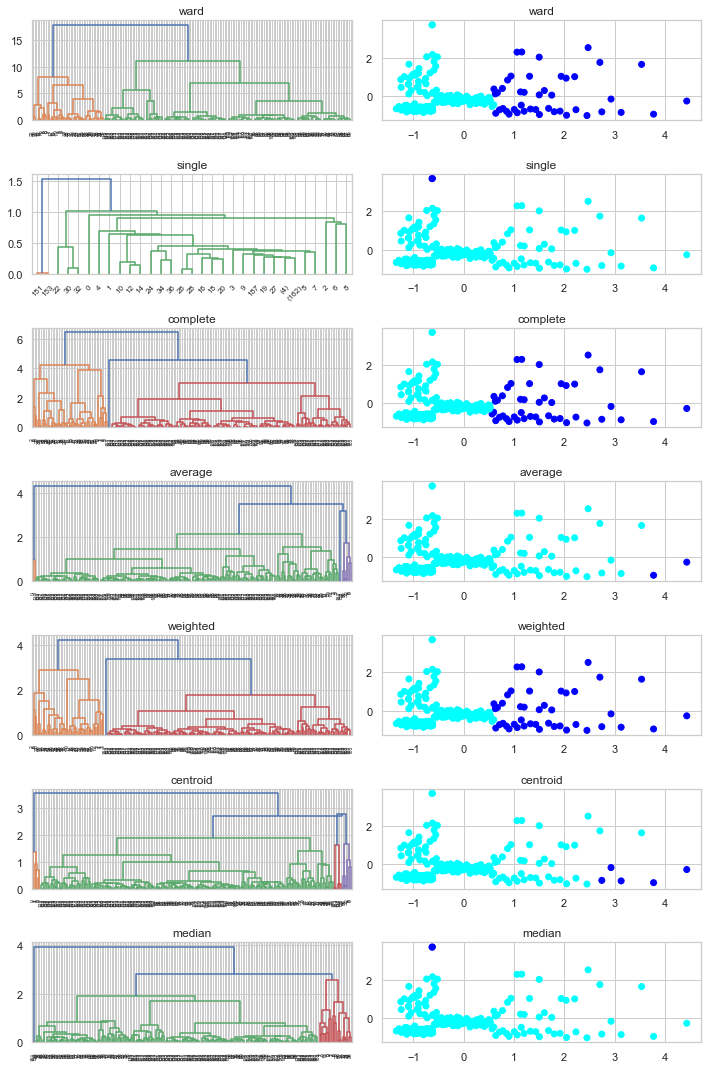

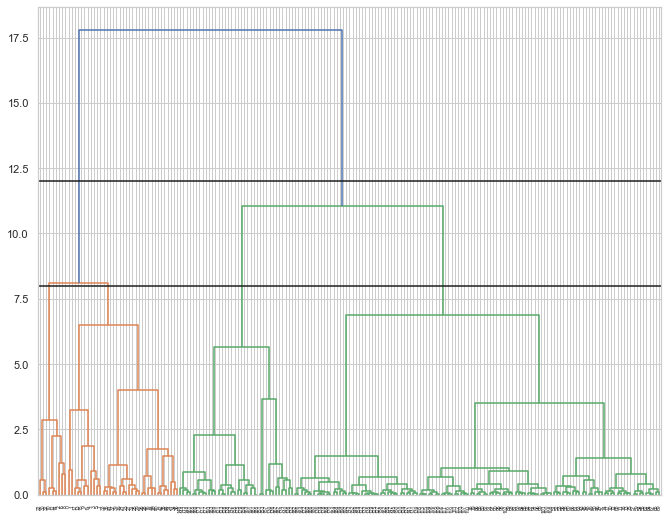

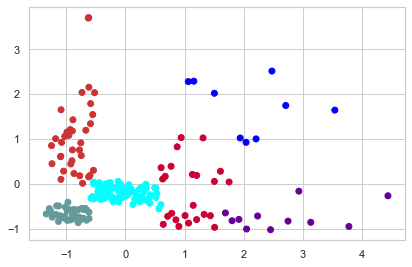

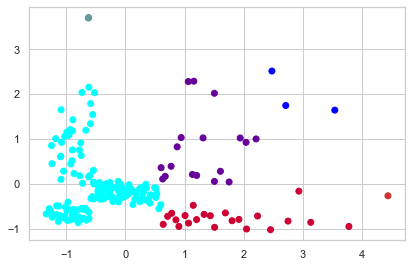

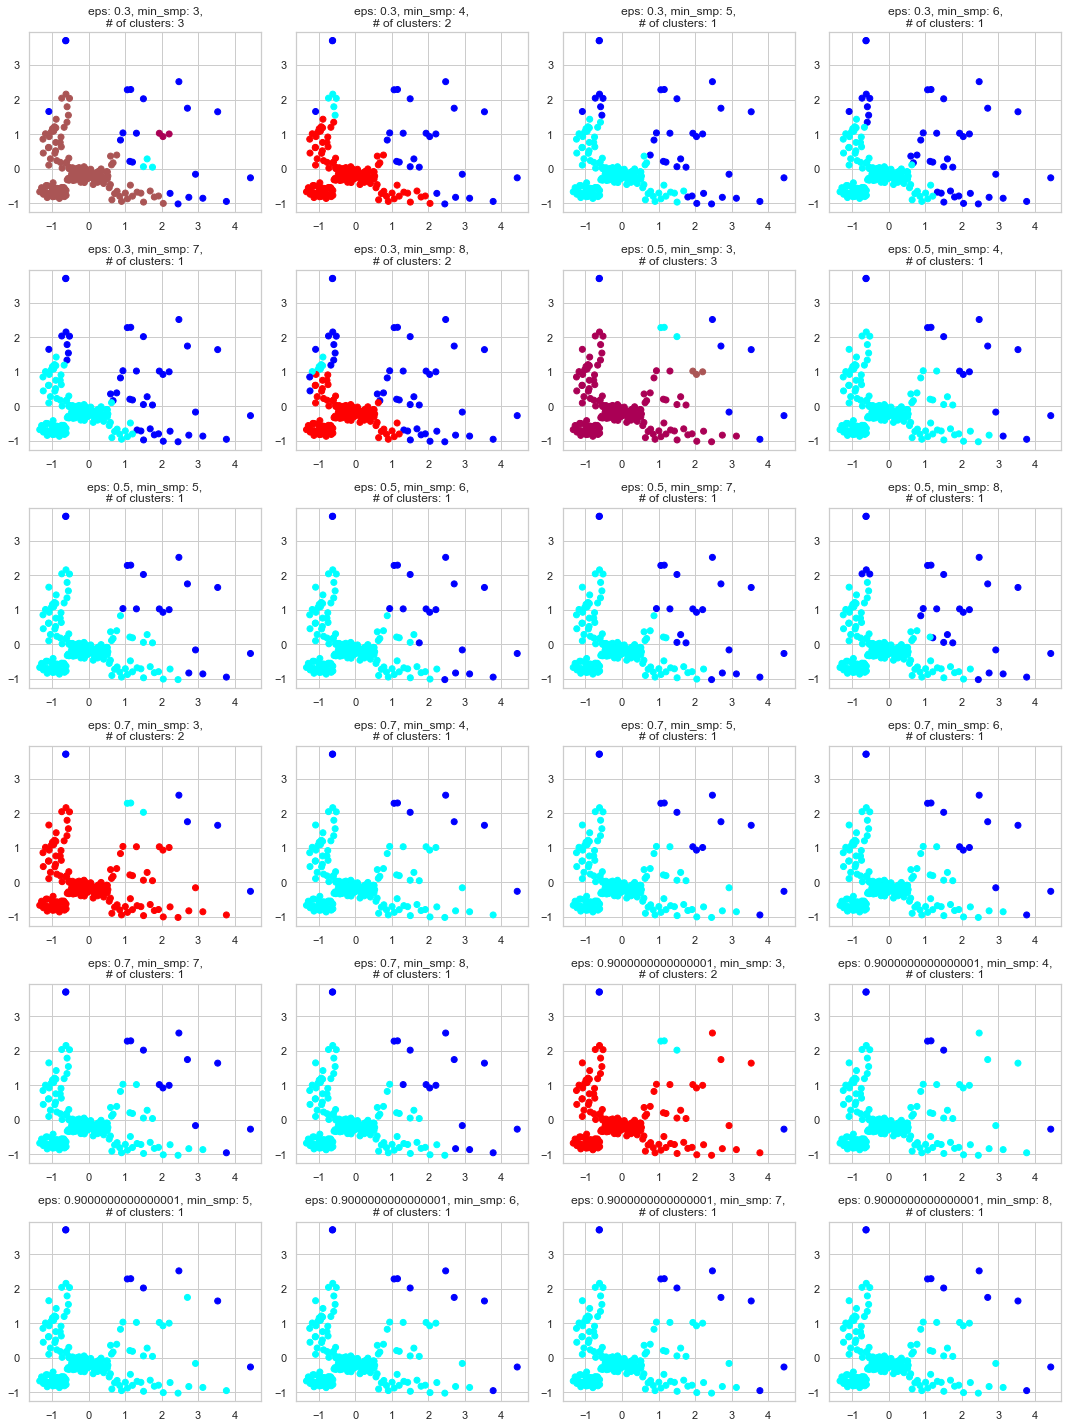

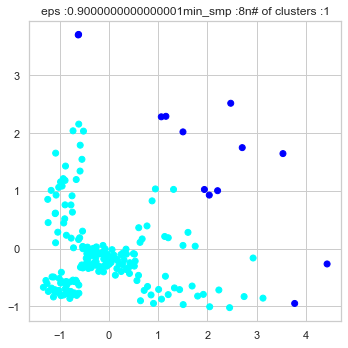

In [93]:
plot_id=0
for method in methods:
    cl=linkage(reduced_data,method=method)
    
    for sw in ['dendrogram','clusters']:
        if sw=='dendrogram':
            plot_id+=1
            plt.subplot(7,2,plot_id)
            plt.title(method)
            fig,ax=plt.gcf(),plt.gca()
            dn=dendrogram(cl,truncate_mode='level',p=15)
            plt.tight_layout()
            fig.set_size_inches(10,15)
        else:
            plot_id+=1
            labels=fcluster(cl,2,criterion='maxclust')
            plt.subplot(7,2,plot_id)
            plt.title(method)
            plt.scatter(reduced_data.Dim1.values.tolist(),
                       reduced_data.Dim2.values.tolist(),
                       cmap=cmap,
                       c=labels)
plt.show()            
cl=linkage(reduced_data,method='ward')
fig,ax=plt.gcf(),plt.gca()
dn=dendrogram(cl,truncate_mode='level',p=15)
plt.tight_layout()
fig.set_size_inches(10,8)
plt.axhline(y=8,c='k')
plt.axhline(y=12,c='k')
plt.show()
cl=linkage(reduced_data,method='ward')
labels=fcluster(cl,6,criterion='maxclust')
plt.scatter(reduced_data.Dim1.values.tolist(),
           reduced_data.Dim2.values.tolist(),
           cmap=cmap,
           c=labels)
plt.show()
cl=linkage(reduced_data,method='weighted')
labels=fcluster(cl,6,criterion='maxclust')
plt.scatter(reduced_data.Dim1.values.tolist(),
           reduced_data.Dim2.values.tolist(),
           cmap=cmap,
           c=labels)
plt.show()
from sklearn.cluster import DBSCAN

plot_id=0
for eps in np.arange(0.3,0.9,0.2):
    for min_samples in range(3,9):
        plot_id+=1
        cl=DBSCAN(eps=eps,min_samples=min_samples)
        result=cl.fit_predict(reduced_data)
        n_clusters=len([c for c in list(set(result)) if c!=-1])
        plt.subplot(6,4,plot_id)
        plt.scatter(reduced_data.Dim1.values.tolist(),
                   reduced_data.Dim2.values.tolist(),
                   cmap=cmap,
                   c=result)
        fig,ax=plt.gcf(),plt.gca()
        fig.set_size_inches(15,20)
        plt.title('eps: ' + str(eps)+', min_smp: ' + str(min_samples)+',\n# of clusters: ' + str(n_clusters))
        plt.tight_layout()
plt.show()
cl=DBSCAN(eps=0.7,min_samples=5)
result=cl.fit_predict(reduced_data)
n_clusters=len([c for c in list(set(result)) if c!=-1])
plt.scatter(reduced_data.Dim1.values.tolist(),
           reduced_data.Dim2.values.tolist(),
           cmap=cmap,
           c=result)
fig,ax=plt.gcf(),plt.gca()
fig.set_size_inches(5,5)
plt.title('eps :'+str(eps)+'min_smp :'+str(min_samples)+'n# of clusters :'+str(n_clusters))
plt.tight_layout()

plt.show()